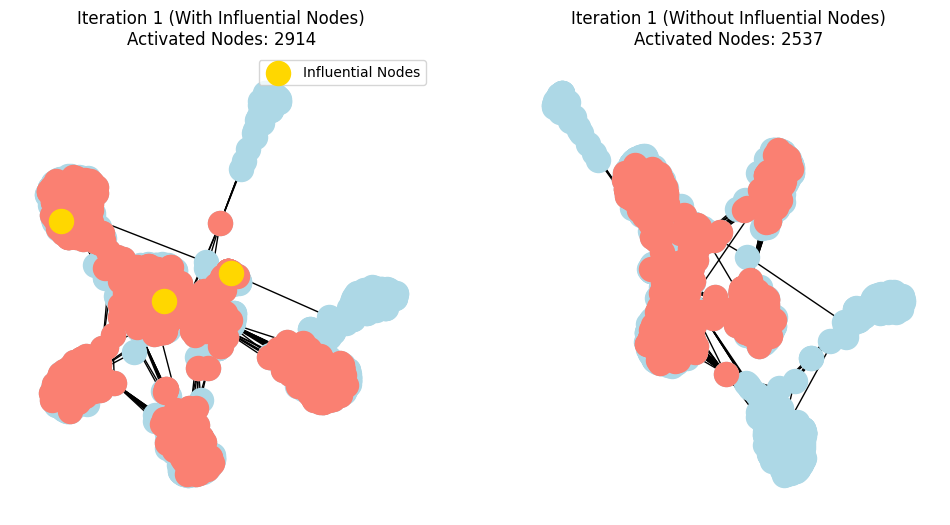

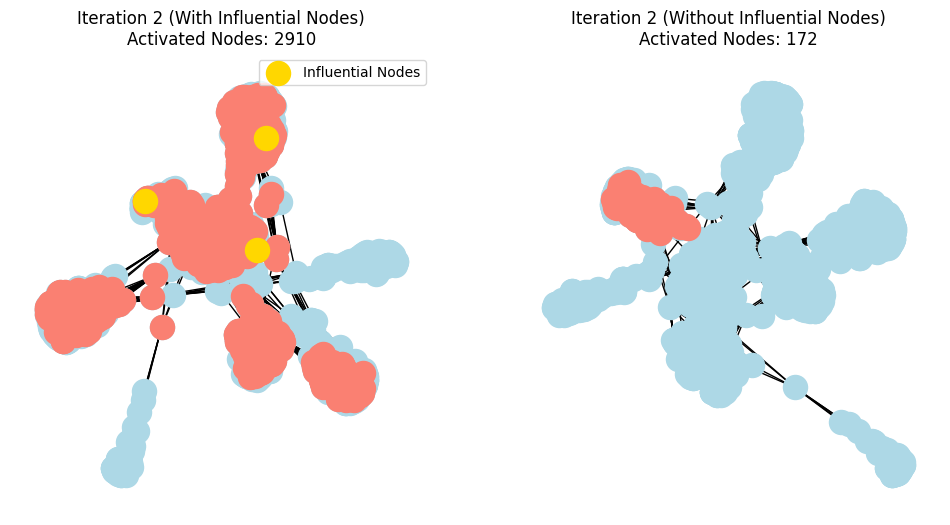

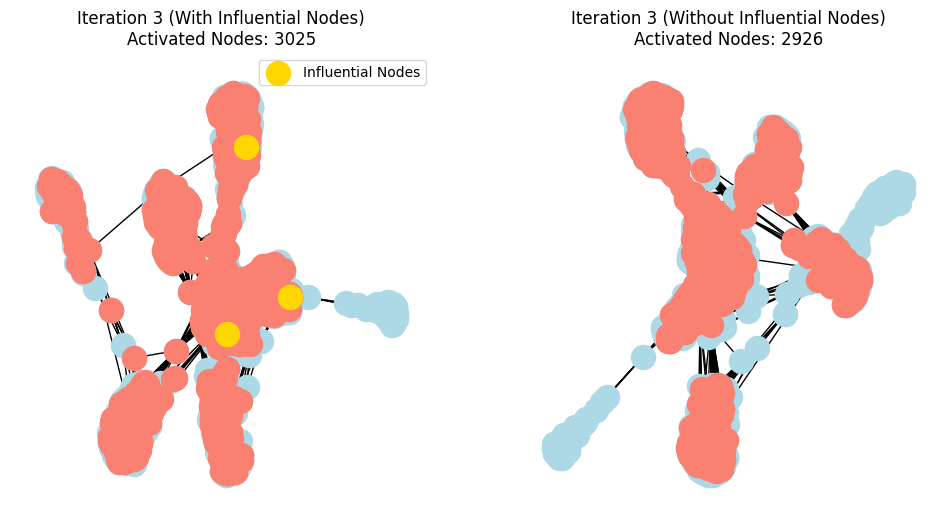

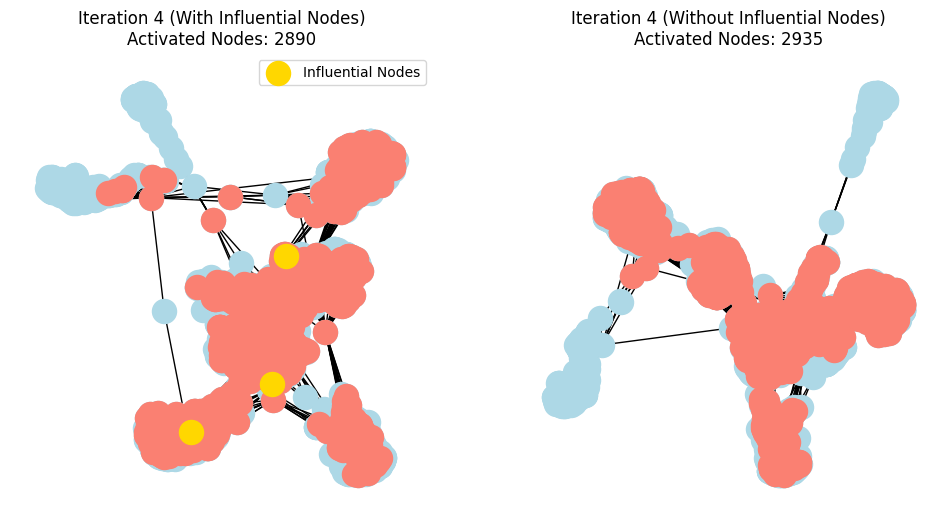

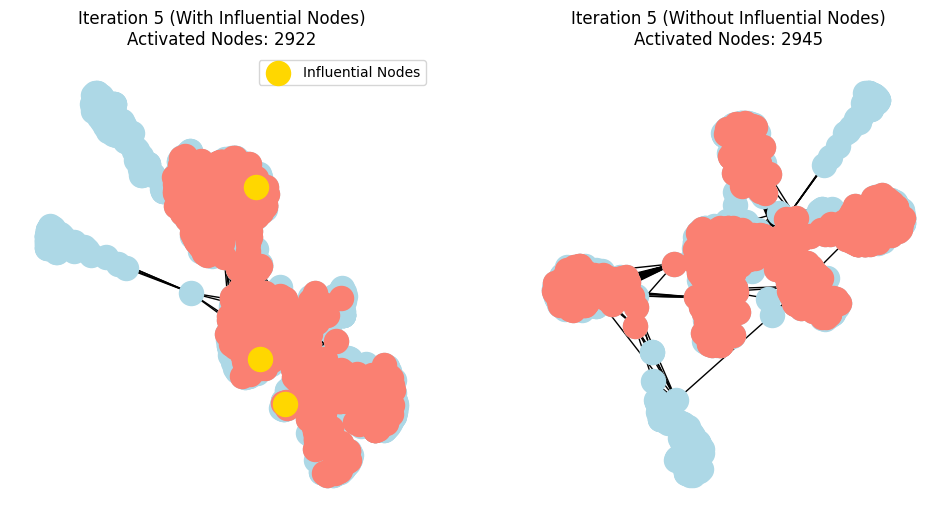

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from random import randint

# Load Facebook graph data
facebook = pd.read_csv(
    "facebook_combined.txt",
    sep=" ",
    names=["start_node", "end_node"],
)

# Create a graph from the loaded data
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

def independent_cascade_model(graph, seed_nodes, influential_nodes, p=0.1):
    activated_nodes = set(seed_nodes)
    newly_activated_nodes = set(seed_nodes)

    while newly_activated_nodes:
        current_nodes = newly_activated_nodes.copy()
        newly_activated_nodes = set()

        for node in current_nodes:
            if node not in graph:
                continue  # Skip nodes that have been removed

            neighbors = set(graph.neighbors(node))
            neighbors -= activated_nodes

            for neighbor in neighbors:
                if np.random.rand() < p:
                    newly_activated_nodes.add(neighbor)

        activated_nodes.update(newly_activated_nodes)

    return list(activated_nodes)

def plot_activation_side_by_side(graph, activated_nodes_with, activated_nodes_without, iteration, influential_nodes=None):
    plt.figure(figsize=(12, 6))

    # Plot with influential nodes
    plt.subplot(1, 2, 1)
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=False, node_color='lightblue', font_weight='bold')
    nx.draw_networkx_nodes(graph, pos, nodelist=activated_nodes_with, node_color='salmon')
    if influential_nodes:
        nx.draw_networkx_nodes(graph, pos, nodelist=influential_nodes, node_color='gold', label='Influential Nodes')
        plt.legend()
    plt.title(f"Iteration {iteration} (With Influential Nodes)\nActivated Nodes: {len(activated_nodes_with)}")

    # Plot without influential nodes
    plt.subplot(1, 2, 2)
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=False, node_color='lightblue', font_weight='bold')
    nx.draw_networkx_nodes(graph, pos, nodelist=activated_nodes_without, node_color='salmon')
    plt.title(f"Iteration {iteration} (Without Influential Nodes)\nActivated Nodes: {len(activated_nodes_without)}")

    plt.show()

def independent_cascade_model_visualization_side_by_side(graph, seed_nodes, p=0.1, influential_nodes=None, max_iter=5):
    activated_nodes_list_with_influential = []
    activated_nodes_list_without_influential = []

    for iteration in range(max_iter):
        # With influential nodes
        seed_nodes_with_influential = independent_cascade_model(graph, seed_nodes, influential_nodes, p)
        activated_nodes_list_with_influential.append(seed_nodes_with_influential.copy())

        # Without influential nodes
        seed_nodes_without_influential = independent_cascade_model(graph, seed_nodes, None, p)
        activated_nodes_list_without_influential.append(seed_nodes_without_influential.copy())

    return activated_nodes_list_with_influential, activated_nodes_list_without_influential

def celf_influence_maximization(graph, k=5, p=0.1):
    influential_nodes = []
    remaining_nodes = set(graph.nodes)

    # Calculate initial spreads
    spreads = {node: len(independent_cascade_model(graph, [node], influential_nodes, p)) for node in remaining_nodes}

    for _ in range(k):
        max_gain = 0
        best_node = None

        for node in remaining_nodes:
            # Calculate marginal gain
            spread = len(independent_cascade_model(graph, influential_nodes + [node], influential_nodes, p))
            gain = spread - spreads[node]

            if gain > max_gain:
                max_gain = gain
                best_node = node

        if best_node:
            influential_nodes.append(best_node)
            remaining_nodes.remove(best_node)

            # Update spreads only for affected nodes
            for node in remaining_nodes:
                neighbors = set(graph.neighbors(node))
                if best_node in neighbors:
                    spreads[node] = len(independent_cascade_model(graph, influential_nodes + [node], influential_nodes, p))

    return influential_nodes

# Example usage:
seed_nodes = [randint(1, 100) for _ in range(5)]
probability_of_activation = 0.1

# Perform CELF Influence Maximization
k = 3  # Set the number of influential nodes to select
influential_nodes = celf_influence_maximization(G, k=k, p=probability_of_activation)

# Perform Independent Cascade Model visualization with and without influential nodes side by side
activated_nodes_list_with, activated_nodes_list_without = independent_cascade_model_visualization_side_by_side(
    G, seed_nodes, p=probability_of_activation, influential_nodes=influential_nodes, max_iter=5
)

# Plot activations side by side for each iteration
for i, (activated_nodes_with, activated_nodes_without) in enumerate(zip(activated_nodes_list_with, activated_nodes_list_without)):
    plot_activation_side_by_side(G, activated_nodes_with, activated_nodes_without, iteration=i + 1, influential_nodes=influential_nodes)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from random import randint

# Load Facebook graph data
facebook = pd.read_csv(
    "facebook_combined.txt",
    sep=" ",
    names=["start_node", "end_node"],
)

# Create a graph from the loaded data
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

def independent_cascade_model(graph, seed_nodes, influential_nodes, p=0.1):
    activated_nodes = set(seed_nodes)
    newly_activated_nodes = set(seed_nodes)

    while newly_activated_nodes:
        current_nodes = newly_activated_nodes.copy()
        newly_activated_nodes = set()

        for node in current_nodes:
            if node not in graph:
                continue  # Skip nodes that have been removed

            neighbors = set(graph.neighbors(node))
            neighbors -= activated_nodes

            for neighbor in neighbors:
                if np.random.rand() < p:
                    newly_activated_nodes.add(neighbor)

        activated_nodes.update(newly_activated_nodes)

    return list(activated_nodes)

def plot_activation_side_by_side(graph, activated_nodes_with, activated_nodes_without, iteration, influential_nodes=None):
    plt.figure(figsize=(12, 6))

    # Plot with influential nodes
    plt.subplot(1, 2, 1)
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=False, node_color='lightblue', font_weight='bold')
    nx.draw_networkx_nodes(graph, pos, nodelist=activated_nodes_with, node_color='salmon')
    if influential_nodes:
        nx.draw_networkx_nodes(graph, pos, nodelist=influential_nodes, node_color='gold', label='Influential Nodes')
        plt.legend()
    plt.title(f"Iteration {iteration} (With Influential Nodes)\nActivated Nodes: {len(activated_nodes_with)}")

    # Plot without influential nodes
    plt.subplot(1, 2, 2)
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=False, node_color='lightblue', font_weight='bold')
    nx.draw_networkx_nodes(graph, pos, nodelist=activated_nodes_without, node_color='salmon')
    plt.title(f"Iteration {iteration} (Without Influential Nodes)\nActivated Nodes: {len(activated_nodes_without)}")

    plt.show()

def independent_cascade_model_visualization_side_by_side(graph, seed_nodes, p=0.1, influential_nodes=None, max_iter=5):
    activated_nodes_list_with_influential = []
    activated_nodes_list_without_influential = []

    for iteration in range(max_iter):
        # With influential nodes
        seed_nodes_with_influential = independent_cascade_model(graph, seed_nodes, influential_nodes, p)
        activated_nodes_list_with_influential.append(seed_nodes_with_influential.copy())

        # Without influential nodes
        seed_nodes_without_influential = independent_cascade_model(graph, seed_nodes, None, p)
        activated_nodes_list_without_influential.append(seed_nodes_without_influential.copy())

        # Run ICM after removing 10 most influential nodes
        if influential_nodes:
            influential_nodes_to_remove = influential_nodes[:min(10, len(influential_nodes))]
            graph_without_influential = graph.copy()
            graph_without_influential.remove_nodes_from(influential_nodes_to_remove)

            seed_nodes_after_removal = independent_cascade_model(graph_without_influential, seed_nodes, None, p)
            activated_nodes_list_without_influential[-1] = seed_nodes_after_removal.copy()

    return activated_nodes_list_with_influential, activated_nodes_list_without_influential

def celf_influence_maximization(graph, k, p=0.1):
    influential_nodes = []
    remaining_nodes = set(graph.nodes)

    # Calculate initial spreads
    spreads = {node: len(independent_cascade_model(graph, [node], influential_nodes, p)) for node in remaining_nodes}

    for _ in range(k):
        max_gain = 0
        best_node = None

        for node in remaining_nodes:
            # Calculate marginal gain
            spread = len(independent_cascade_model(graph, influential_nodes + [node], influential_nodes, p))
            gain = spread - spreads[node]

            if gain > max_gain:
                max_gain = gain
                best_node = node

        if best_node:
            influential_nodes.append(best_node)
            remaining_nodes.remove(best_node)

            # Update spreads only for affected nodes
            for node in remaining_nodes:
                neighbors = set(graph.neighbors(node))
                if best_node in neighbors:
                    spreads[node] = len(independent_cascade_model(graph, influential_nodes + [node], influential_nodes, p))

    return influential_nodes

# Example usage:
seed_nodes = [randint(1, 100) for _ in range(5)]
probability_of_activation = 0.1

# Perform CELF Influence Maximization
k = 40  # Set the number of influential nodes to select
influential_nodes = celf_influence_maximization(G, k, p=probability_of_activation)

# Perform Independent Cascade Model visualization with and without influential nodes side by side
activated_nodes_list_with, activated_nodes_list_without = independent_cascade_model_visualization_side_by_side(
    G, seed_nodes, p=probability_of_activation, influential_nodes=influential_nodes, max_iter=5
)

# Plot activations side by side for each iteration
for i, (activated_nodes_with, activated_nodes_without) in enumerate(zip(activated_nodes_list_with, activated_nodes_list_without)):
    plot_activation_side_by_side(G, activated_nodes_with, activated_nodes_without, iteration=i + 1, influential_nodes=influential_nodes)
